# Anomaly Detection (tutorial 1)

(array([500]),)


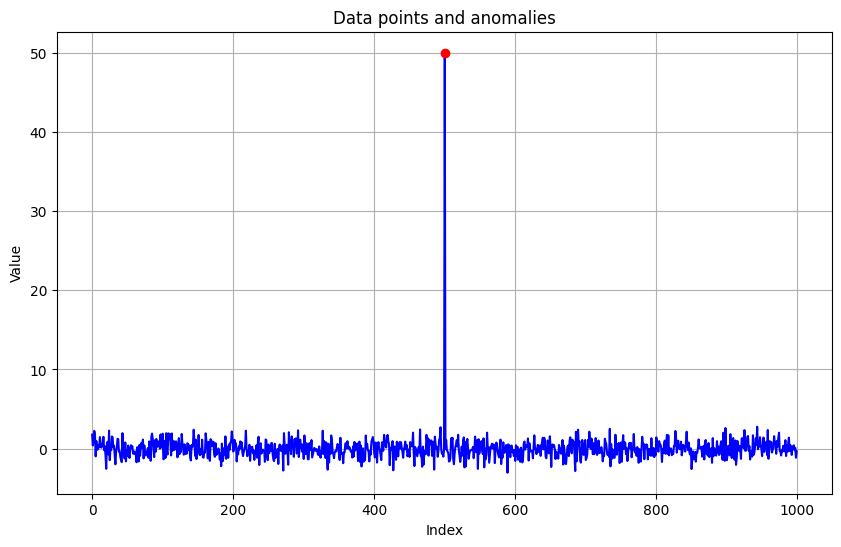

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Generate 1000 data points from a normal distribution with mean 0 and standard deviation 1
data = np.random.normal(0, 1, 1000)

# Introduce an anomaly - a point that is much different than the rest
data[500] = 50

# A simple anomaly detection function
def detect_anomalies(data, threshold=3):
    # Calculate the mean and standard deviation of the data
    mean, std = np.mean(data), np.std(data)
    # Identify anomalies - points that are more than `threshold` standard deviations away from the mean
    anomalies = np.abs(data - mean) > threshold * std
    return anomalies

# Detect anomalies
anomalies = detect_anomalies(data)      # index for anomaly data
print(np.where(anomalies))

# Plot the data and the anomalies
plt.figure(figsize=(10, 6))
plt.plot(data, 'b-')
plt.plot(np.where(anomalies)[0], data[anomalies], 'ro')
plt.title('Data points and anomalies')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [9]:
test = np.array([0, 0, 0, 1, 0 ,0])
test[np.where(test)[0]]

array([1])

## Z-test

In [19]:
'''
In this example, we first generate two groups of random data from a 
normal distribution. The np.random.normal function generates random 
numbers from a normal distribution with a specified mean and standard 
deviation. We then perform a Z-Test using the stats.ttest_ind function 
from the scipy library. This function returns two values: the Z-Score 
and the P-Value. The Z-Score is a measure of how many standard deviations 
an element is from the mean. The P-Value is used in hypothesis testing 
to help you support or reject the null hypothesis. It represents the 
probability that the results of your test occurred at random. If p-value 
is less than 0.05, we reject the null hypothesis.
'''

from scipy import stats
import numpy as np

# Generate random data
np.random.seed(0)
group1 = np.random.normal(0.1, 1.0, 1000)
group2 = np.random.normal(0.2, 1.0, 1000)

# Perform Z-Test
z_score, p_value = stats.ttest_ind(group1, group2)
print(f"Z-Score: {z_score}, P-Value: {p_value}")

Z-Score: -3.631948749571147, P-Value: 0.00028837831940553923


In [21]:
from scipy.stats import norm

def z_test(sample_mean, population_mean, population_std, sample_size, alpha=0.05):
    """
    Perform a one-sample z-test and compute the z-score.

    Parameters:
        sample_mean (float): The mean of the sample.
        population_mean (float): The mean of the population.
        population_std (float): The standard deviation of the population.
        sample_size (int): The size of the sample.
        alpha (float): The significance level (default is 0.05 for a 95% confidence level).

    Returns:
        z_score (float): The computed z-score.
        p_value (float): The p-value for the test.
        critical_value (float): The critical value for the significance level.
        is_significant (bool): True if the result is significant, False otherwise.
    """
    # Compute the standard error
    standard_error = population_std / (sample_size ** 0.5)

    # Compute the z-score
    z_score = (sample_mean - population_mean) / standard_error

    # Compute the p-value (two-tailed test)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Determine the critical value for the given alpha (two-tailed)
    critical_value = norm.ppf(1 - alpha / 2)

    # Check significance
    is_significant = abs(z_score) > critical_value

    return z_score, p_value, critical_value, is_significant


# Example Usage:
sample_mean = 400
population_mean = 500
population_std = 50
sample_size = 12
alpha = 0.05

z_score, p_value, critical_value, is_significant = z_test(sample_mean, population_mean, population_std, sample_size, alpha)

print(f"Z-Score: {z_score:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Critical Value (±): {critical_value:.2f}")
print(f"Is the result significant? {'Yes' if is_significant else 'No'}")


Z-Score: -6.93
P-Value: 0.0000
Critical Value (±): 1.96
Is the result significant? Yes


## T-test

In [13]:
'''
This example is very similar to the Z-Test example. The difference is that 
we are using smaller sample sizes (30 instead of 1000). The T-Test is more 
appropriate than the Z-Test when the sample size is small. The interpretation 
of the T-Score and P-Value is the same as for the Z-Test.
'''

# Generate random data
np.random.seed(0)
group1 = np.random.normal(0.1, 1.0, 30)
group2 = np.random.normal(0.2, 1.0, 30)

# Perform T-Test
t_score, p_value = stats.ttest_ind(group1, group2)
print(f"T-Score: {t_score}, P-Value: {p_value}")

T-Score: 2.421173504228532, P-Value: 0.018620022435273602


In [ ]:
from scipy.stats import t

def t_test(sample, population_mean, alpha=0.05):
    """
    Perform a one-sample t-test.

    Parameters:
        sample (list or array): The sample data points.
        population_mean (float): The mean of the population to test against.
        alpha (float): The significance level (default is 0.05 for a 95% confidence level).

    Returns:
        t_stat (float): The computed t-statistic.
        p_value (float): The p-value for the test.
        critical_value (float): The critical t-value for the significance level.
        is_significant (bool): True if the result is significant, False otherwise.
    """
    # Calculate sample mean and standard deviation
    sample_mean = sum(sample) / len(sample)
    sample_std = (sum((x - sample_mean) ** 2 for x in sample) / (len(sample) - 1)) ** 0.5

    # Compute the t-statistic
    t_stat = (sample_mean - population_mean) / (sample_std / len(sample) ** 0.5)

    # Degrees of freedom
    df = len(sample) - 1

    # Compute the p-value (two-tailed)
    p_value = 2 * (1 - t.cdf(abs(t_stat), df))

    # Determine the critical t-value for the given alpha (two-tailed)
    critical_value = t.ppf(1 - alpha / 2, df)

    # Check significance
    is_significant = abs(t_stat) > critical_value

    return t_stat, p_value, critical_value, is_significant


# Example Usage:
sample = [480, 490, 495, 505, 510, 520, 485, 470]
population_mean = 500
alpha = 0.05

t_stat, p_value, critical_value, is_significant = t_test(sample, population_mean, alpha)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Critical Value (±): {critical_value:.2f}")
print(f"Is the result significant? {'Yes' if is_significant else 'No'}")

T-Statistic: -0.96
P-Value: 0.3689
Critical Value (±): 2.36
Is the result significant? No


In [18]:
from scipy.stats import ttest_ind

def two_sample_t_test(sample1, sample2, alpha=0.05):
    """
    Perform a two-sample t-test for independent samples.

    Parameters:
        sample1 (list or array): The data points for the first sample.
        sample2 (list or array): The data points for the second sample.
        alpha (float): The significance level (default is 0.05 for a 95% confidence level).

    Returns:
        t_stat (float): The computed t-statistic.
        p_value (float): The p-value for the test.
        is_significant (bool): True if the result is significant, False otherwise.
    """
    # Perform the two-sample t-test
    t_stat, p_value = ttest_ind(sample1, sample2, equal_var=True)  # Assume equal variances

    # Determine if the result is significant
    is_significant = p_value < alpha

    return t_stat, p_value, is_significant


# Example Usage:
class_a_scores = [85, 90, 88, 78, 92, 95, 89, 91]
class_b_scores = [72, 75, 78, 74, 80, 79, 77, 76]
alpha = 0.05

t_stat, p_value, is_significant = two_sample_t_test(class_a_scores, class_b_scores, alpha)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Is the result significant? {'Yes' if is_significant else 'No'}")


T-Statistic: 5.91
P-Value: 0.0000
Is the result significant? Yes


## ANOVA test

In [14]:
'''
In this example, we generate three groups of random data and perform an 
ANOVA test using the stats.f_oneway function. The F-Score is a measure of 
how much the means of each group differ from the mean of the overall data 
set. The P-Value is the same as in the previous examples. If the P-Value 
is less than 0.05, we can reject the null hypothesis that the means of 
all groups are equal.
'''

# Generate random data
np.random.seed(0)
group1 = np.random.normal(0.1, 1.0, 30)
group2 = np.random.normal(0.2, 1.0, 30)
group3 = np.random.normal(0.3, 1.0, 30)

# Perform ANOVA
f_score, p_value = stats.f_oneway(group1, group2, group3)
print(f"F-Score: {f_score}, P-Value: {p_value}")

F-Score: 3.0583006692442627, P-Value: 0.052048465538565784


## Linear regression

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.810e+04
Date:                Sun, 05 Jan 2025   Prob (F-statistic):          9.03e-129
Time:                        16:10:20   Log-Likelihood:                 85.585
No. Observations:                 100   AIC:                            -167.2
Df Residuals:                      98   BIC:                            -162.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0075      0.010      0.722      0.4

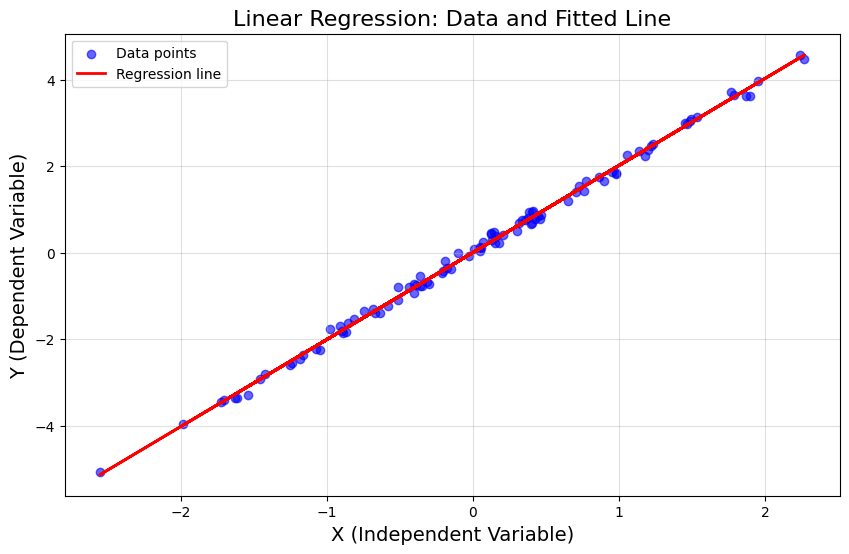

In [25]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
X_orig = np.random.normal(0, 1.0, 100)  # Original X without the constant
Y = 2 * X_orig + np.random.normal(0, 0.1, 100)

# Add constant to input variables
X = sm.add_constant(X_orig)

# Perform Linear Regression
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

# Extract regression line
predicted_Y = results.predict(X)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.scatter(X_orig, Y, color='blue', alpha=0.6, label='Data points')

# Plot the regression line
plt.plot(X_orig, predicted_Y, color='red', label='Regression line', linewidth=2)

# Add labels, title, and legend
plt.xlabel('X (Independent Variable)', fontsize=14)
plt.ylabel('Y (Dependent Variable)', fontsize=14)
plt.title('Linear Regression: Data and Fitted Line', fontsize=16)
plt.legend()
plt.grid(alpha=0.4)
plt.show()


In [ ]:
'''
In this case, the p-value will give us the probability that we would see 
these results given the null hypothesis of no association between the 
categorical variables. If this p-value is below a certain significance 
level (often 0.05), we reject the null hypothesis and conclude that there 
is a statistically significant association between the variables.
'''

from scipy.stats import chi2_contingency

# Define a 2-D contingency table
table = np.array([[10, 20, 30],
                  [20, 40, 60]])

chi2, p, dof, ex = chi2_contingency(table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected table: \n{ex}")

Chi-Square statistic: 0.0
P-value: 1.0
Degrees of freedom: 2
Expected table: 
[[10. 20. 30.]
 [20. 40. 60.]]
